<a href="https://colab.research.google.com/github/bin0819/MCU-project/blob/main/Policy_And_Value_Iteration_Gambler_Problem_ipynz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Written by Max Chiswick
on January 14, 2020 \\
Policy And Value Iteration Gambler Problem \\
Ref:https://chisness.github.io/2020-01-14/policy-and-value-iteration-gambler-problem

Policy Iteration

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

p_heads = .4 #正面朝上的機率
GAMMA = 1
rewards = np.zeros(101) #獎勵函數 0到100塊
rewards[100] = 1  #100塊時，獎勵為1
iteration=0
class policy_iteration:
  def __init__(self):
      self.val_state = np.zeros(101)  # 初始化value function 0到100塊
      self.policy = np.zeros(100)  # 初始化策略 0到99塊 (下注金額)
      self.iteration = 0  # 迭代次數

  def bellman(self, state, action, val_state):
      """E[R(t+1)+r*V(S(t+1))|S(t)=S]"""
      return p_heads * (rewards[state + action] + GAMMA * val_state[state + action]) + \
              (1 - p_heads) * (rewards[state - action] + GAMMA * val_state[state - action])

  def policy_evaluation(self, epsilon=1e-10):
      """Evaluate the policy until the value function converges."""
      while True:
          delta = 0
          self.iteration += 1  # 迭代次數+1
          print(f"Policy Evaluation iteration {self.iteration}:")

          for state in range(1, 100):  #1到99 忽略states(0 and 100)
              v = self.val_state[state]
              # 更新value function在當下的policy
              self.val_state[state] = self.bellman(state, int(self.policy[state]), self.val_state)
              delta = max(delta, np.abs(self.val_state[state] - v))  #紀錄value function變化

          print(f"\tDelta after this iteration: {delta:.10f}\n")
          if delta < epsilon:
              break

      return self.policy_improvement()

  def policy_improvement(self):
    policy_stable = True
    #print('STARTING POLICY IMPROVEMENT')
    for state in range(1,100): #1到99
      old_action = self.policy[state] #舊policy（之前的最佳policy）
      max_action = min(state, 100-state) #當下state 所能下的最大籌碼
      val_action = np.zeros(max_action+1) #用來存 每一個可能的action 所得到的 value function
      for action in range(1, max_action+1): #1到max_action
        val_action[action] = self.bellman(state, action, self.val_state)
      #x = np.argwhere(val_action == np.max(val_action))
      #self.policy[state] = x[-1]
      self.policy[state] = np.argmax(val_action) #傳回val_action中最大值的索引 在目前state下選擇的最佳的action
      # print('state', state)
      # print(np.argwhere(val_action >= np.max(val_action)).squeeze())
      # print(self.policy[state])
      # #print(np.argwhere(val_action >= np.max(val_action)*0.99).squeeze())
      # print(np.random.choice(np.argwhere(val_action == np.max(val_action)).squeeze()))
      #self.policy[state] = np.random.choice(np.argwhere(val_action == np.max(val_action)).squeeze())

      if old_action != self.policy[state]: #檢查policy是否有改變
        policy_stable = False
        print('Not stable state', state)
    print('Stable situation', policy_stable)
    if policy_stable != True:
      self.policy_evaluation()
    return self.val_state, self.policy


Gambler Graphs (Policy Iteration)

Policy Evaluation iteration 1:
	Delta after this iteration: 0.0000000000

Not stable state 50
Not stable state 51
Not stable state 52
Not stable state 53
Not stable state 54
Not stable state 55
Not stable state 56
Not stable state 57
Not stable state 58
Not stable state 59
Not stable state 60
Not stable state 61
Not stable state 62
Not stable state 63
Not stable state 64
Not stable state 65
Not stable state 66
Not stable state 67
Not stable state 68
Not stable state 69
Not stable state 70
Not stable state 71
Not stable state 72
Not stable state 73
Not stable state 74
Not stable state 75
Not stable state 76
Not stable state 77
Not stable state 78
Not stable state 79
Not stable state 80
Not stable state 81
Not stable state 82
Not stable state 83
Not stable state 84
Not stable state 85
Not stable state 86
Not stable state 87
Not stable state 88
Not stable state 89
Not stable state 90
Not stable state 91
Not stable state 92
Not stable state 93
Not stable state 94
Not stable state 95
Not st

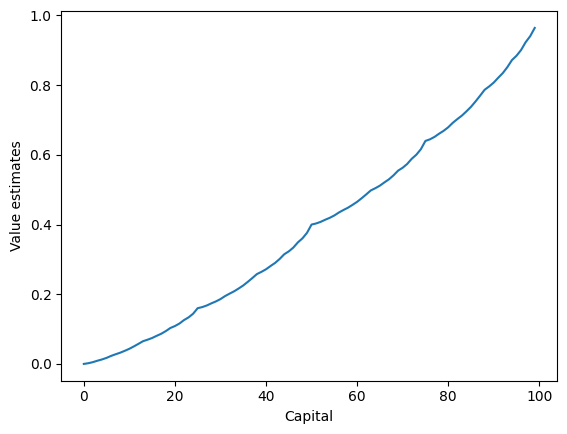

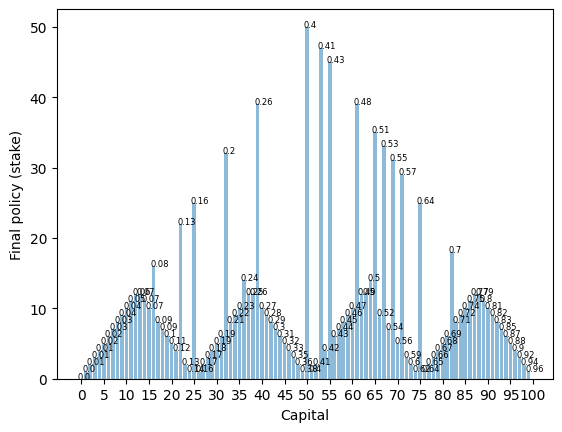

In [ ]:
pi = policy_iteration()
v_pi, p_pi = pi.policy_evaluation()
print(v_pi)
print(p_pi)

plt.plot(range(100), v_pi[:100])
plt.xlabel('Capital')
plt.ylabel('Value estimates')
plt.show() #不同的資本額(state)的value function

plt.bar(range(100), p_pi, align = 'center', alpha = 0.5) #畫柱狀圖 x=0到99 y=policy
for i in range(100): #0到99
	plt.text(i - 0.75, p_pi[i] + 0.01, str(round(v_pi[i],2)), fontsize=6) #在柱狀圖上加value function
plt.xlabel('Capital')
plt.xticks(np.arange(0, 101, 5))
plt.ylabel('Final policy (stake)')
plt.show()

Value Itertion

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

p_heads = .4 #正面朝上的機率
GAMMA = 1
rewards = np.zeros(101) #獎勵函數 0到100塊
rewards[100] = 1 #100塊時，獎勵為1

class value_iteration:
    def __init__(self):
        self.val_state = np.zeros(101, dtype=np.float128) # 初始化value function 0到100塊 0和100忽略
        self.policy = np.zeros(100, dtype=np.float128) # 初始化策略 0到99塊 (下注金額)
        self.iteration = 0

    def bellman(self, state, action, val_state):
        return p_heads * (rewards[state + action] + GAMMA * val_state[state + action]) + (1 - p_heads) * (rewards[state - action] + GAMMA * val_state[state - action])

    def val_iteration(self, epsilon = 1e-50):
        while True:
            self.iteration += 1  # Increment iteration counter
            delta = 0
            print(f"Value Iteration {self.iteration}:")

            for state in range(1, 100): #1到99
                v = self.val_state[state]
                max_action = min(state, 100 - state) #當下state 所能下的最大籌碼
                val_action = np.zeros(max_action + 1, dtype=np.float128)
                for action in range(1, max_action + 1): #所有可能下注的金額
                    val_action[action] = self.bellman(state, action, self.val_state)
                    if state == 50:  # Optional: Debugging check for state 50
                        print(action, val_action[action])

                # 更新value function
                self.val_state[state] = np.max(val_action)

                # Find maximum change over all states
                delta = max(delta, np.abs(self.val_state[state] - v)) #紀錄value function變化

            # Check for convergence
            if delta < epsilon:
                print("Value function converged.")
                break

        return self.policy_it()

    def policy_it(self):
        for state in range(1, 100): #1到99
            max_action = min(state, 100 - state) #當下state 所能下的最大籌碼
            val_action = np.zeros(max_action + 1)

            for action in range(1, max_action + 1): #1到max_action
                val_action[action] = self.bellman(state, action, self.val_state)

            # Update the policy with the best action
            best_action = np.argmax(val_action) #找到最大的value function的action
            self.policy[state] = best_action

        return self.val_state, self.policy


Gambler Graphs (Value Iteration)

Value Iteration 1:
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 0.0
38 0.0
39 0.0
40 0.0
41 0.0
42 0.0
43 0.0
44 0.0
45 0.0
46 0.0
47 0.0
48 0.0
49 0.0
50 0.4000000000000000222
Value Iteration 2:
1 0.3813376000000000253
2 0.36889600000000002624
3 0.36889600000000002624
4 0.34816000000000002702
5 0.34816000000000002702
6 0.34816000000000002702
7 0.313600000000000027
8 0.313600000000000027
9 0.313600000000000027
10 0.313600000000000027
11 0.313600000000000027
12 0.313600000000000027
13 0.25600000000000002487
14 0.25600000000000002487
15 0.25600000000000002487
16 0.25600000000000002487
17 0.25600000000000002487
18 0.25600000000000002487
19 0.25600000000000002487
20 0.25600000000000002487
21 0.25600000000000002487
22 0.25600000000000002487
23 0.25600000000000002487
24 0.25600000000000002487
2

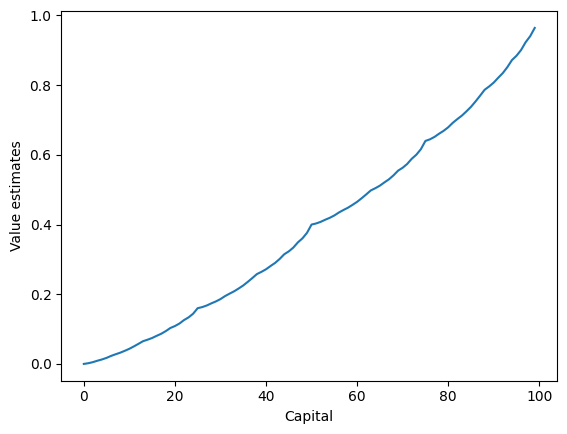

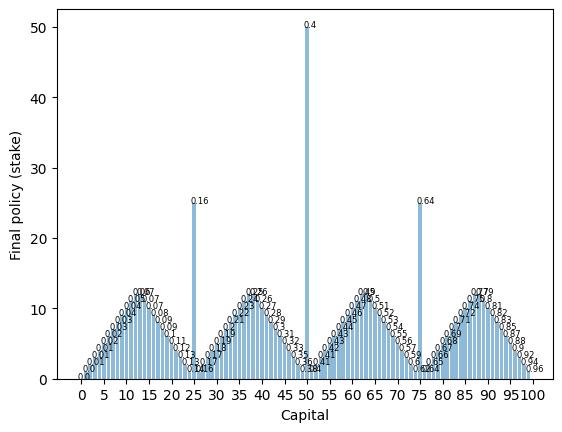

In [ ]:
vi = value_iteration()
v_vi, p_vi = vi.val_iteration()
print(v_vi)
print(p_vi)

plt.plot(range(100), v_vi[:100])
plt.xlabel('Capital')
plt.ylabel('Value estimates')
plt.show()

plt.bar(range(100), p_vi, align = 'center', alpha = 0.5)
for i in range(100):
	plt.text(i - 0.75, p_vi[i] + 0.01, str(round(v_vi[i],2)), fontsize=6)
plt.xlabel('Capital')
plt.xticks(np.arange(0, 101, 5)) #X軸刻度 步數為5
plt.ylabel('Final policy (stake)')
plt.show()